# Курс "Обработка изображений" ВШЭ

## 3 модуль

### Фильтрация изображений

#### Операция свертки. Линейные фильтры

In [35]:
# Для вывода изображений
from IPython.display import Image

import matplotlib.pyplot as plt

На данный момент мы ввели понятие корелляции и свертки, рассмотрели пример их работы на изображения султана

Оба этих алгоритма принимают на вход изображение и ядро, применяется для нахождения объектов в изображении, например, для решения задачи MNIST

Свертка отличается от корелляции тем, что ядро зеркалиравано по горизлонтали и вертикали

Но существует проблема того, что на краях изображений свертка не работает, поэтому в курсе предлагают ряд решений, при которых возможно уменьшение размерности, или более продвинутые решения для сохранения размеров изображения

#### box-фильтр

Затем рассматривается BOX-FILTER^ в ядре которого записаны единички и присутствуетнормированный коэффицент, которая гарантирует, что сумма всех элементов ядра равна тоже единичке

Применяется для многих приложений для размытия изображений

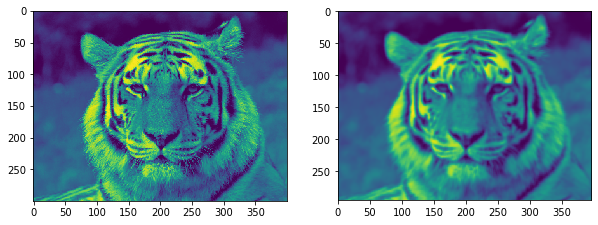

In [26]:
from skimage.io import imread, imsave, imshow
from skimage import img_as_float, img_as_ubyte

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
new_img = []


for i in range(2, len(img) - 2):
    new_img.append([])
    for j in range(2, len(img[0]) - 2):
        new_img[-1].append(0)
        for x in range(i - 2, i + 3):
            for y in range(j - 2, j + 3):
                new_img[-1][-1] += img[x, y]
        
        new_img[-1][-1] /= 25

new_img = np.array(new_img)

ax[0].imshow(img.astype("uint8"))
ax[1].imshow(new_img.astype("uint8"))

#### Гаусовский фильтр

Гаусовский фильтр используется для сглаживания изображений

Этот алгортим тоже использует ядро, но заполняется она по специальной формуле

\begin{equation*}
G_\sigma(x, y) = \frac{1}{2\pi\sigma^2}e^\frac{-x^2-y^2}{2\sigma^2}
\end{equation*}

Она примечательна тем, что в ней используется экспонента, а так же ее можно настроить параметром сигма. 

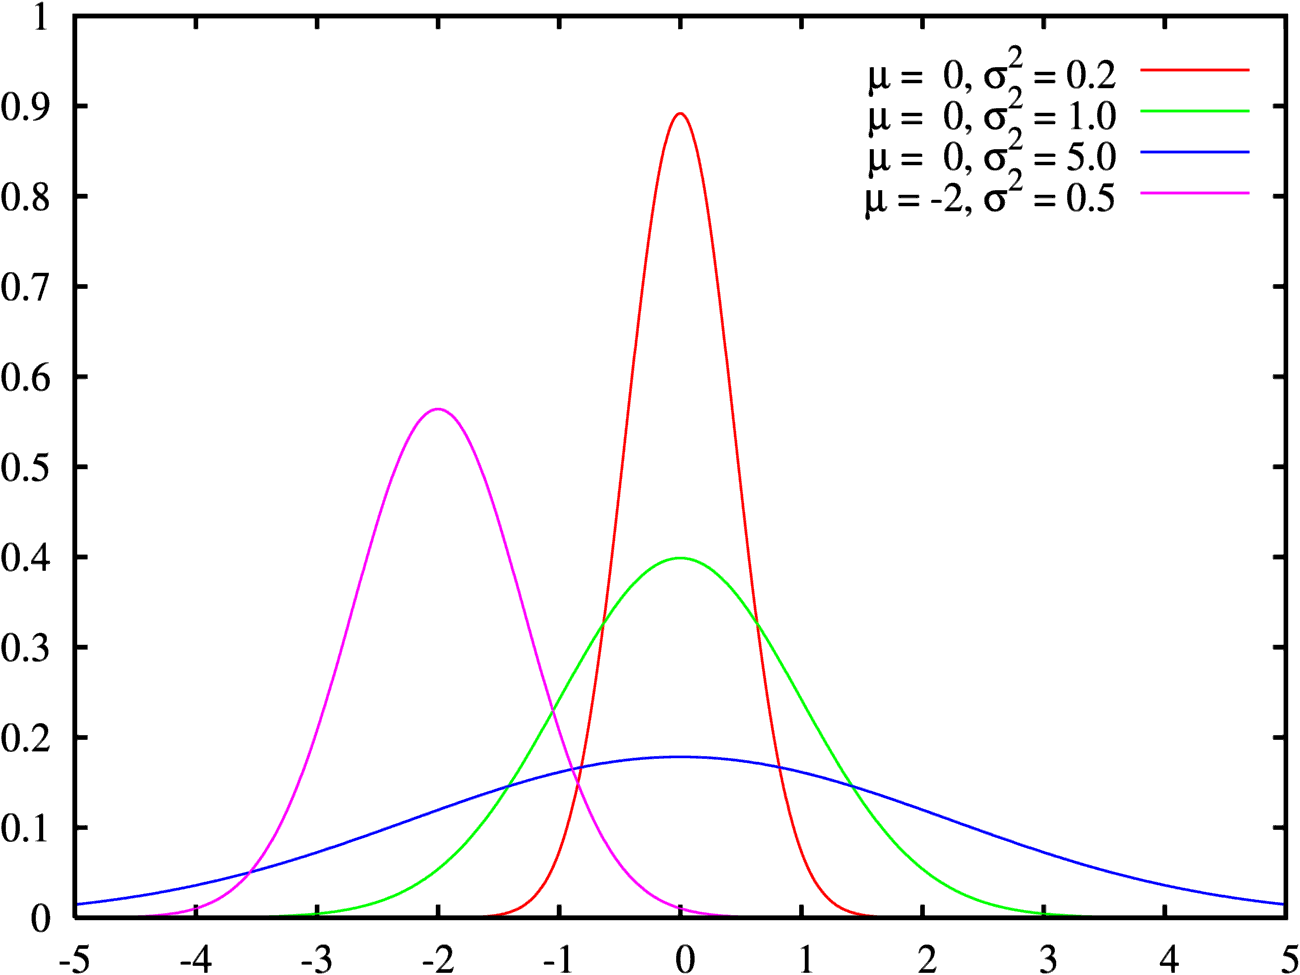

In [37]:
Image("https://upload.wikimedia.org/wikipedia/commons/1/1b/Normal_distribution_pdf.png", width=500)

#### Подсчет функции Гауса

Из параметров сигма, x, y нужно было определить G

In [45]:
q, x, y = list(map(int, input("Введите параметры сигма, x, y через пробел: ").split()))

print((1 / (2 * math.pi * q**2)) * math.exp( (-x**2 - y**2) / (2 * q**2)))

Введите параметры сигма, x, y через пробел:  1 1 1


0.05854983152431917


#### Ядро гаусовского фильтра

Теперь нужно по функции гауса и параметру сигма составить ядро для сглаживания:

In [54]:
import numpy as np
import math

def gauss(q, x, y):
    return (1 / (2 * math.pi * q**2)) * math.exp((-x**2 - y**2) / (2 * q**2))

q = float(input("Введите параметр сигма: "))

k = round(2 * 3 * q) + 1
center = math.ceil(k / 2) - 1

core = []

for i in range(k):
    core.append([])
    for j in range(k):
        core[-1].append(gauss(q, i - center, j - center))

core = np.array(core)
core = core / core.sum()

for i in range(len(core)):
    for j in range(len(core)):
        print("%.5f" % core[i][j], end = " ")
    print()

Введите параметр сигма:  0.33


0.00010 0.00974 0.00010 
0.00974 0.96065 0.00974 
0.00010 0.00974 0.00010 


#### Гауссовская фильтрация.

И нужно было реализовать фильрацию изображений с использованием алгортима гауса

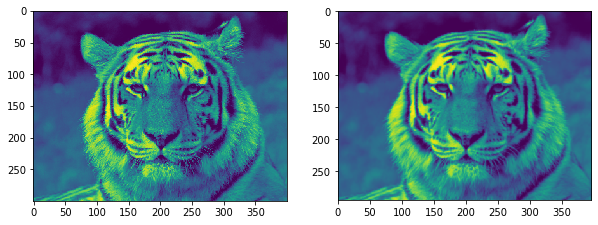

In [61]:
from skimage.io import imread, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np
import math

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

def gauss(q, x, y):
    return (1 / (2 * math.pi * q**2)) * math.exp((-x**2 - y**2) / (2 * q**2))

def get_core(q):
    k = round(2 * 3 * q) + 1
    center = math.ceil(k / 2) - 1

    core = []

    for i in range(k):
        core.append([])
        for j in range(k):
            core[-1].append(gauss(q, i - center, j - center))

    core = np.array(core)
    core = core / core.sum()

    return core

img = img_as_float(imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png"))
new_img = []
yd = get_core(0.66)

for i in range(2, len(img) - 2):
    new_img.append([])
    for j in range(2, len(img[0]) - 2):
        new_img[-1].append(0)
        for x in range(i - 2, i + 3):
            for y in range(j - 2, j + 3):
                new_img[-1][-1] += img[x, y] * yd[x - i + 2, y - j + 2]

new_img = np.clip(new_img, 0, 1)
new_img = new_img * 255

ax[0].imshow(img)
ax[1].imshow(new_img.astype("uint8"))

#### Повышение резкости изображения.

Нужно было повысить резкость изображения используя специальное ядро

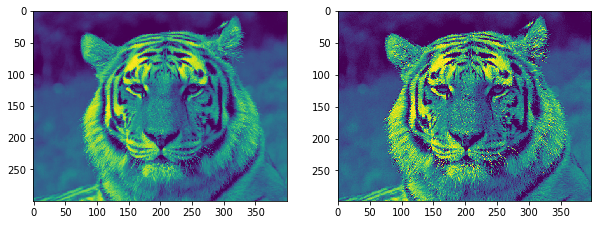

In [62]:
from skimage.io import imread, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np
import math

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
new_img = []
core = np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]])

for i in range(1, len(img) - 1):
    new_img.append([])
    for j in range(1, len(img[0]) - 1):
        new_img[-1].append(0)
        for x in range(i - 1, i + 2):
            for y in range(j - 1, j + 2):
                new_img[-1][-1] += img[x, y] * core[x - i + 1][y - j + 1] / 10
                
        new_img[-1][-1] = np.clip(new_img[-1][-1], 0, 255)
        
new_img = np.array(new_img).astype("uint8")

ax[0].imshow(img)
ax[1].imshow(new_img)

К сожалению, мой алгоритм не проходит тесты stepik, т.к. отличается на 1 пиксель с их версией изображения.

### Медианный фильтр

Это новый фильтр, исправляющий шумы изображения называемые "соль и перец", похожие на битые фильтры.

Работа фильтра работает следующим образом: берутся ближащие пиксели и усредняется значение пикселя посередине

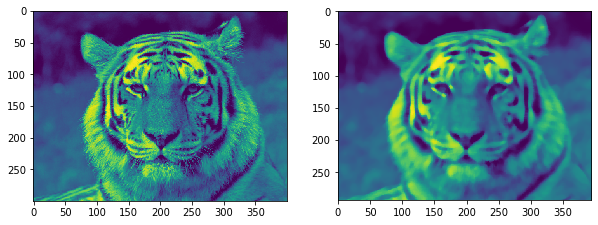

In [67]:
from skimage.io import imread, imsave
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

img = imread("https://stepik.org/media/attachments/lesson/61041/tiger-gray-small.png")
new_img = []

for i in range(3, len(img) - 3):
    new_img.append([])
    for j in range(3, len(img[0]) - 3):
        pixels = []
        for x in range(i - 3, i + 4):
            for y in range(j - 3, j + 4):
                pixels.append(img[x, y])
        
        new_img[-1].append(np.median(pixels))
        
new_img = np.array(new_img)

ax[0].imshow(img)
ax[1].imshow(new_img)

Далее рассматривется возможность оптимизации реализации медианного фильтра посредством окон и гистограмм